In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 20)

In [76]:
# Get footywire match data with a row for each player
df_footywire_data = pd.read_csv(r'inputs/footywire_player_matches.csv', index_col=0)
df_footywire_data = df_footywire_data.drop_duplicates()
df_footywire_data

,Date,Season,Round,Venue,Player,Team,Opposition,Status,Match_id,CP,UP,ED,DE,CM,GA,MI5,One.Percenters,BO,TOG,K,HB,D,M,G,B,T,HO,GA1,I50,CL,CG,R50,FF,FA,AF,SC,CCL,SCL,SI,MG,TO,ITC,T5
1,2010-03-25,2010,Round 1,MCG,Daniel Connors,Richmond,Carlton,Home,5089,8,15,16,66.7,0,0,0,1,0,69,14,10,24,3,0,0,1,0,0,2,2,4,6,2,0,77,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-25,2010,Round 1,MCG,Daniel Jackson,Richmond,Carlton,Home,5089,11,10,14,60.9,1,0,0,0,0,80,11,12,23,2,0,0,5,0,0,8,5,4,1,2,0,85,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-03-25,2010,Round 1,MCG,Brett Deledio,Richmond,Carlton,Home,5089,7,14,16,76.2,0,0,0,0,0,89,12,9,21,5,1,0,6,0,0,4,3,4,3,1,2,94,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-03-25,2010,Round 1,MCG,Ben Cousins,Richmond,Carlton,Home,5089,9,10,11,57.9,0,1,0,0,0,69,13,6,19,1,1,0,1,0,1,1,2,3,4,1,0,65,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-03-25,2010,Round 1,MCG,Trent Cotchin,Richmond,Carlton,Home,5089,8,10,13,68.4,1,0,0,0,1,77,11,8,19,6,0,0,1,0,0,2,3,3,2,0,2,65,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90416,2019-09-28,2019,Grand Final,MCG,Harrison Himmelberg,GWS,Richmond,Away,9927,3,9,7,58.3,1,0,2,4,0,92,9,3,12,7,1,1,1,2,0,2,0,3,0,1,1,65,51,0.0,0.0,3.0,153.0,4.0,2.0,1.0
90417,2019-09-28,2019,Grand Final,MCG,Samuel Reid,GWS,Richmond,Away,9927,5,6,8,66.7,0,0,0,4,0,96,5,7,12,2,0,0,3,0,0,0,1,2,1,0,0,47,55,0.0,1.0,1.0,97.0,2.0,5.0,0.0
90418,2019-09-28,2019,Grand Final,MCG,Adam Kennedy,GWS,Richmond,Away,9927,4,8,9,81.8,0,0,0,1,0,71,5,6,11,4,0,0,4,0,0,2,1,0,0,1,0,56,55,0.0,1.0,1.0,121.0,0.0,5.0,1.0
90419,2019-09-28,2019,Grand Final,MCG,Shane Mumford,GWS,Richmond,Away,9927,8,2,7,70.0,0,0,0,4,0,75,2,8,10,0,0,0,1,15,0,1,2,2,1,1,0,42,62,1.0,1.0,0.0,0.0,1.0,2.0,0.0


In [77]:
# Create a summary to get the total SC and AF points for each match
df_match_summary = pd.pivot_table(df_footywire_data, index=['Match_id'], values=['SC', 'AF'], columns=['Status'], aggfunc=np.sum)
df_match_summary = df_match_summary.reset_index()
df_match_summary.columns = df_match_summary.columns.to_series().str.join('_')
df_match_summary = df_match_summary.rename(columns={'Match_id_': 'Match_id'})
df_match_summary

,Match_id,AF_Away,AF_Home,SC_Away,SC_Home
0,4961,1411,1610,1656,1661
1,4962,1393,1713,1359,1944
2,4963,1452,1900,1332,1973
3,4964,1699,1364,1776,1534
4,4965,1643,1503,1742,1556
...,...,...,...,...,...
2032,9923,1363,1544,1495,1802
2033,9924,1338,1415,1622,1678
2034,9925,1492,1385,1680,1616
2035,9926,1518,1580,1657,1641


In [78]:
# get footywire match data with a single row for each match
df_footywire_matches = pd.read_csv(r'Inputs/footywire_team_matches.csv', index_col=0)
df_footywire_matches

,year,date,venue,crowd,match_id,home_team,away_team,home_team_score,away_team_score
0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Richmond,Carlton,64,120
1,2010,Fri 26 Mar 7:40pm,MCG,57772,5090,Geelong,Essendon,125,94
2,2010,Sat 27 Mar 2:10pm,MCG,45615,5091,Melbourne,Hawthorn,61,117
3,2010,Sat 27 Mar 7:10pm,ANZ Stadium,31330,5093,Sydney,St Kilda,88,96
4,2010,Sat 27 Mar 7:30pm,Gabba,29201,5092,Brisbane,West Coast,114,82
...,...,...,...,...,...,...,...,...,...
202,2019,Fri 13 Sep 7:50pm,MCG,51813,9923,Geelong,West Coast,88,68
203,2019,Sat 14 Sep 7:25pm,Gabba,30034,9924,Brisbane,GWS,80,83
204,2019,Fri 20 Sep 7:50pm,MCG,94423,9925,Richmond,Geelong,85,66
205,2019,Sat 21 Sep 4:35pm,MCG,77828,9926,Collingwood,GWS,52,56


In [79]:
# Merge the fantasy summary and the match scores
df_match_fantasy_summary = pd.merge(df_footywire_matches, df_match_summary,how='left', left_on='match_id', right_on='Match_id')
# Drop bye and cancelled games
df_match_fantasy_summary = df_match_fantasy_summary.drop(df_match_fantasy_summary.loc[df_match_fantasy_summary['venue'] == "BYE"].index)
df_match_fantasy_summary = df_match_fantasy_summary.drop(df_match_fantasy_summary.loc[df_match_fantasy_summary['venue'] == "MATCH CANCELLED"].index)
df_match_fantasy_summary

,year,date,venue,crowd,match_id,home_team,away_team,home_team_score,away_team_score,Match_id,AF_Away,AF_Home,SC_Away,SC_Home
0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Richmond,Carlton,64,120,5089,1938,1250,1986,1321
1,2010,Fri 26 Mar 7:40pm,MCG,57772,5090,Geelong,Essendon,125,94,5090,1503,1774,1523,1775
2,2010,Sat 27 Mar 2:10pm,MCG,45615,5091,Melbourne,Hawthorn,61,117,5091,1863,1516,1829,1470
3,2010,Sat 27 Mar 7:10pm,ANZ Stadium,31330,5093,Sydney,St Kilda,88,96,5093,1490,1532,1637,1661
4,2010,Sat 27 Mar 7:30pm,Gabba,29201,5092,Brisbane,West Coast,114,82,5092,1543,1607,1609,1691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,2019,Fri 13 Sep 7:50pm,MCG,51813,9923,Geelong,West Coast,88,68,9923,1363,1544,1495,1802
2033,2019,Sat 14 Sep 7:25pm,Gabba,30034,9924,Brisbane,GWS,80,83,9924,1338,1415,1622,1678
2034,2019,Fri 20 Sep 7:50pm,MCG,94423,9925,Richmond,Geelong,85,66,9925,1492,1385,1680,1616
2035,2019,Sat 21 Sep 4:35pm,MCG,77828,9926,Collingwood,GWS,52,56,9926,1518,1580,1657,1641


In [80]:
# Calculate the match result, the SC result, and the AF result
def get_match_result(home_score, away_score):
    result = ""
    if home_score > away_score:
        result = "home_win"
    elif home_score < away_score:
        result = "away_win"
    elif home_score == away_score:
        result = "tie"
    return result

df_match_fantasy_summary['match_result'] = df_match_fantasy_summary.apply(lambda row: get_match_result(row['home_team_score'], row['away_team_score']), axis=1)
df_match_fantasy_summary['match_result_home_margin'] = df_match_fantasy_summary['home_team_score'] - df_match_fantasy_summary['away_team_score']
df_match_fantasy_summary['match_result_away_margin'] = df_match_fantasy_summary['away_team_score'] - df_match_fantasy_summary['home_team_score']
df_match_fantasy_summary['sc_result'] = df_match_fantasy_summary.apply(lambda row: get_match_result(row['SC_Home'], row['SC_Away']), axis=1)
df_match_fantasy_summary['sc_correct?'] = df_match_fantasy_summary.apply(lambda row: row['sc_result'] == row['match_result'], axis=1)
df_match_fantasy_summary['af_result'] = df_match_fantasy_summary.apply(lambda row: get_match_result(row['AF_Home'], row['AF_Away']), axis=1)
df_match_fantasy_summary['af_correct?'] = df_match_fantasy_summary.apply(lambda row: row['af_result'] == row['match_result'], axis=1)
df_match_fantasy_summary['diff_fantasy_result'] = df_match_fantasy_summary.apply(lambda row: row['sc_result'] != row['af_result'], axis=1)
df_match_fantasy_summary.iloc[1627::]

,year,date,venue,crowd,match_id,home_team,away_team,home_team_score,away_team_score,Match_id,AF_Away,AF_Home,SC_Away,SC_Home,match_result,match_result_home_margin,match_result_away_margin,sc_result,sc_correct?,af_result,af_correct?,diff_fantasy_result
1627,2018,Sat 24 Mar 6:25pm,Cazaly's Stadium,3722,9518,Gold Coast,North Melbourne,55,39,9518,1358,1714,1518,1782,home_win,16,-16,home_win,True,home_win,True,False
1628,2018,Sat 24 Mar 7:25pm,MCG,58051,9519,Hawthorn,Collingwood,101,67,9519,1503,1600,1533,1770,home_win,34,-34,home_win,True,home_win,True,False
1629,2018,Sun 25 Mar 1:10pm,Canberra Oval,10454,9520,GWS,Western Bulldogs,133,51,9520,1396,1843,1356,1943,home_win,82,-82,home_win,True,home_win,True,False
1630,2018,Sun 25 Mar 3:20pm,MCG,54112,9521,Melbourne,Geelong,94,97,9521,1610,1463,1699,1601,away_win,-3,3,away_win,True,away_win,True,False
1631,2018,Sun 25 Mar 4:20pm,Optus Stadium,53553,9522,West Coast,Sydney,86,115,9522,1596,1502,1766,1536,away_win,-29,29,away_win,True,away_win,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,2019,Fri 13 Sep 7:50pm,MCG,51813,9923,Geelong,West Coast,88,68,9923,1363,1544,1495,1802,home_win,20,-20,home_win,True,home_win,True,False
2033,2019,Sat 14 Sep 7:25pm,Gabba,30034,9924,Brisbane,GWS,80,83,9924,1338,1415,1622,1678,away_win,-3,3,home_win,False,home_win,False,False
2034,2019,Fri 20 Sep 7:50pm,MCG,94423,9925,Richmond,Geelong,85,66,9925,1492,1385,1680,1616,home_win,19,-19,away_win,False,away_win,False,False
2035,2019,Sat 21 Sep 4:35pm,MCG,77828,9926,Collingwood,GWS,52,56,9926,1518,1580,1657,1641,away_win,-4,4,away_win,True,home_win,False,True


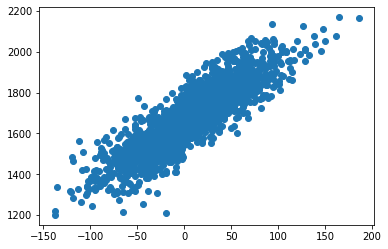

In [98]:
# Home team results
plt.scatter(df_match_fantasy_summary['match_result_home_margin'], df_match_fantasy_summary['SC_Home'])
plt.show()

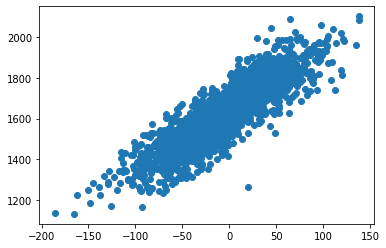

In [99]:
# Away team results
plt.scatter(df_match_fantasy_summary['match_result_away_margin'], df_match_fantasy_summary['SC_Away'])
plt.show()

### Supercoach is the most accurate!

In [117]:
sc_series = df_match_fantasy_summary['sc_correct?'].value_counts()
af_series = df_match_fantasy_summary['af_correct?'].value_counts()
data_dict = {
    'sc_correct?': sc_series,
    'af_correct?': af_series
}
df_fantasy_accuracy = pd.DataFrame(data_dict).transpose()
df_fantasy_accuracy['Total'] = df_fantasy_accuracy[True] + df_fantasy_accuracy[False] 
df_fantasy_accuracy['% Correct'] = round((df_fantasy_accuracy[True] / df_fantasy_accuracy['Total']) * 100, 2)
df_fantasy_accuracy

,True,False,Total,% Correct
sc_correct?,1783,254,2037,87.53
af_correct?,1607,430,2037,78.89


In [118]:
from sklearn import linear_model
from sklearn import model_selection

X = df_match_fantasy_summary['SC_Home']
X = np.array(X).reshape(-1, 1)
y = df_match_fantasy_summary['match_result_home_margin']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.30)

clr = linear_model.LinearRegression()

cv_result = model_selection.cross_val_score(estimator=clr
                                , X=X_train
                                , y=y_train
                                , cv=50
                                , scoring="neg_mean_squared_error"
                                )

cv_result.mean()

-475.28776598366284

In [119]:
from sklearn import metrics

clr.fit(X_train, y_train)
pred = clr.predict(X_test)
sc_mse = metrics.mean_squared_error(pred, y_test)

In [120]:
from sklearn import linear_model
from sklearn import model_selection

X = df_match_fantasy_summary['AF_Home']
X = np.array(X).reshape(-1, 1)
y = df_match_fantasy_summary['match_result_home_margin']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.30)

clr = linear_model.LinearRegression()

cv_result = model_selection.cross_val_score(estimator=clr
                                , X=X_train
                                , y=y_train
                                , cv=50
                                , scoring="neg_mean_squared_error"
                                )

cv_result.mean()

-1058.7060992170452

In [121]:
from sklearn import metrics

clr.fit(X_train, y_train)
pred = clr.predict(X_test)
af_mse = metrics.mean_squared_error(pred, y_test)

In [125]:
{
    "Supercoach Mean Squared Error": round(sc_mse, 1),
    "AFL Fantasy Mean Squared Error": round(af_mse, 1)
}

{'Supercoach Mean Squared Error': 498.3,
 'AFL Fantasy Mean Squared Error': 1157.9}

### Supercoach score is a more reliable indicator of the winning/losing margin